In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Merge data

In [280]:
DATA_PATH = 'human+activity+recognition+using+smartphones/UCI HAR Dataset/'

# Load feature names
features = pd.read_csv(DATA_PATH + 'features.txt', sep='\s+', header=None)

# Load activity labels
activity_labels = pd.read_csv(DATA_PATH + 'activity_labels.txt', sep='\s+', header=None, index_col=0)

# Function to load the datasets
def load_dataset(prefix, features):
    unique_feature_names = []
    for i, feature_name in enumerate(features[1].tolist()):
        if feature_name in unique_feature_names:
            unique_feature_names.append(feature_name + "_" + str(i))
        else:
            unique_feature_names.append(feature_name)
    
    X = pd.read_csv(DATA_PATH + prefix + '/X_'+prefix+'.txt', sep='\s+', header=None, names=unique_feature_names)
    y = pd.read_csv(DATA_PATH + prefix + '/y_'+prefix+'.txt', sep='\s+', header=None, names=['Activity'])
    subject = pd.read_csv(DATA_PATH + prefix + '/subject_'+prefix+'.txt', sep='\s+', header=None, names=['Subject'])
    
    # Merge data
    dataset = pd.concat([subject, X, y], axis=1)
    return dataset

In [281]:
# Load training data
train_data = load_dataset('train', features)

# Load testing data
test_data = load_dataset('test', features)

# Combine training and testing data
combined_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

# Save combined data
combined_data.to_csv('combined_data.csv', index=False)

In [247]:
combined_data.head()

,Subject,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [248]:
combined_data.isna().sum()

Subject                                 0
tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Activity                                0
Length: 563, dtype: int64

In [249]:
combined_data.describe()

,Subject,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,16.146422,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,3.624624
std,8.679067,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,1.743695
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,9.000000,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,2.000000
50%,17.000000,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,4.000000
75%,24.000000,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,5.000000
max,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


## Data Preprocessing

In [250]:
from sklearn.preprocessing import StandardScaler

features = combined_data.iloc[:, 1:-1]  # Excluding subject and activity columns for feature standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [251]:
features_scaled.shape

(10299, 561)

### Import Libraries

In [252]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### Define Functions

In [253]:
# Determine the optimal number of clusters using the Elbow Method
def kmeans_optimal_finder(features):
    wcss = []
    for i in range(1, 11):  # Test 1 to 10 clusters
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow graph
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [254]:
# Choose the optimal number of clusters and apply K-Means
def kmeans_plot(features, n_clusters, title=''):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_clusters = kmeans.fit_predict(features)
    
    if title == 'pca' or title == 'PCA':
        title = 'K-Means Clustering with PCA-reduced Data'
    elif title == 'tsne' or title == 'TSNE':
        title = 'K-Means Clustering with t-SNE-reduced Data'
    else:
        title = 'K-Means Clustering'
        
    plt.figure(figsize=(10, 6))
    plt.scatter(features[:, 0], features[:, 1], c=kmeans_clusters, cmap='viridis')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

In [255]:
# Determine the optimal epsilon using the K-Distance Graph
def KDistanceGraph(features, k):
    X = features
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)

    # Sort the distances
    sorted_distances = np.sort(distances, axis=0)
    sorted_distances = sorted_distances[:, k-1]
    
    # Plot the K-Distance Graph
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_distances)
    plt.title('K-Distance Graph')
    plt.xlabel('Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.grid(True)
    plt.show()

In [256]:
def dbscan_plot(features, eps, min_samples, title=''):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_clusters = dbscan.fit_predict(features)
    
    if title == 'pca' or title == 'PCA':
        title = 'DBSCAN Clustering with PCA-reduced Data'
    elif title == 'tsne' or title == 'TSNE':
        title = 'DBSCAN Clustering with t-SNE-reduced Data'
    else:
        title = 'DBSCAN Clustering'
        
    plt.figure(figsize=(10, 6))
    plt.scatter(features[:, 0], features[:, 1], c=dbscan_clusters, cmap='viridis')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()


#### Tuning Eps and min_sample for DBSCAN

In [257]:
def tuning_eps_min_samples(features, eps_values, min_sample_values):
    # Initialize best score and parameters
    best_silhouette = -1
    best_eps = None
    best_min_samples = None

    # Grid search
    for eps in eps_values:
        for min_samples in min_sample_values:
            # Perform DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(features)

            # Calculate the silhouette score
            # Note: Silhouette score can only be calculated with more than one cluster 
            # and less than number of samples - 1
            if len(set(clusters)) > 1 and len(set(clusters)) < len(features) - 1:
                silhouette_avg = silhouette_score(features, clusters)

                # Check if we have a new best score
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples

    print(f"Best silhouette score: {best_silhouette}")
    print(f"Best eps: {best_eps}")
    print(f"Best min_samples: {best_min_samples}")

## Before Dimensionality Reduction

### K-Means Clustering

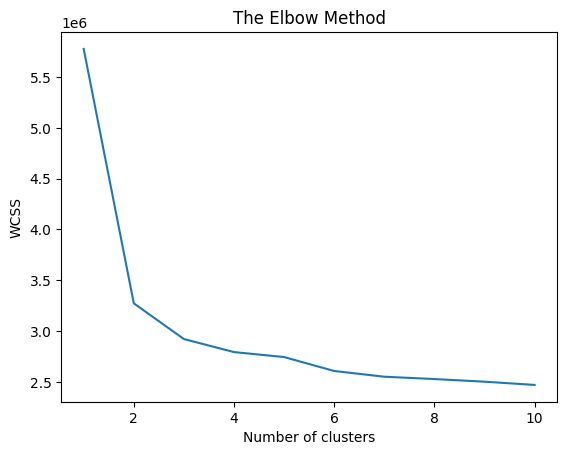

In [258]:
# Find optimal cluster size
kmeans_optimal_finder(features=features_scaled)

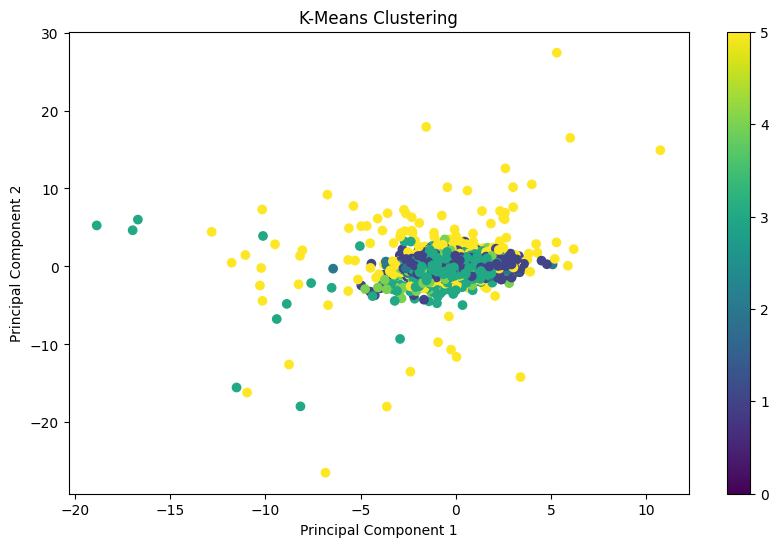

In [259]:
# Apply Optimal value and see the clustering
kmeans_plot(features=features_scaled, n_clusters=6)

### DBSCAN Clustering

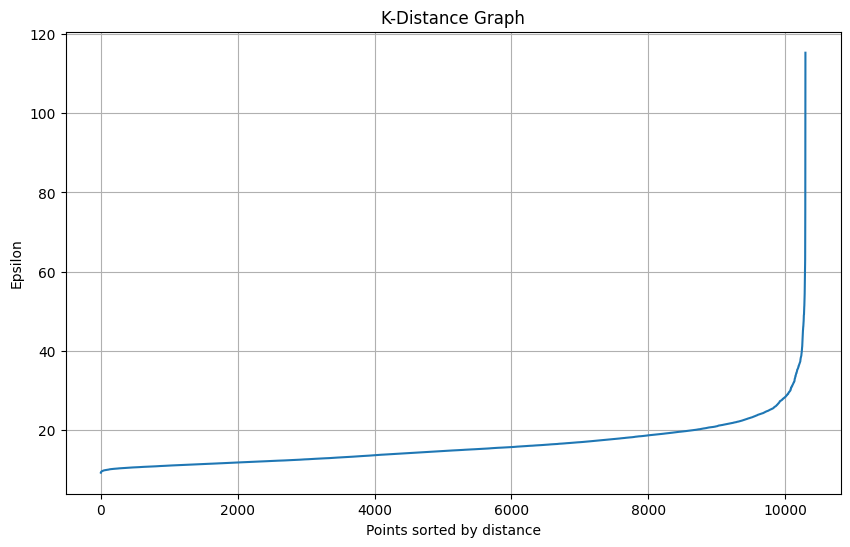

In [260]:
# Find Epsilon for our DBSCAN clustering
KDistanceGraph(features=features_scaled, k=50)

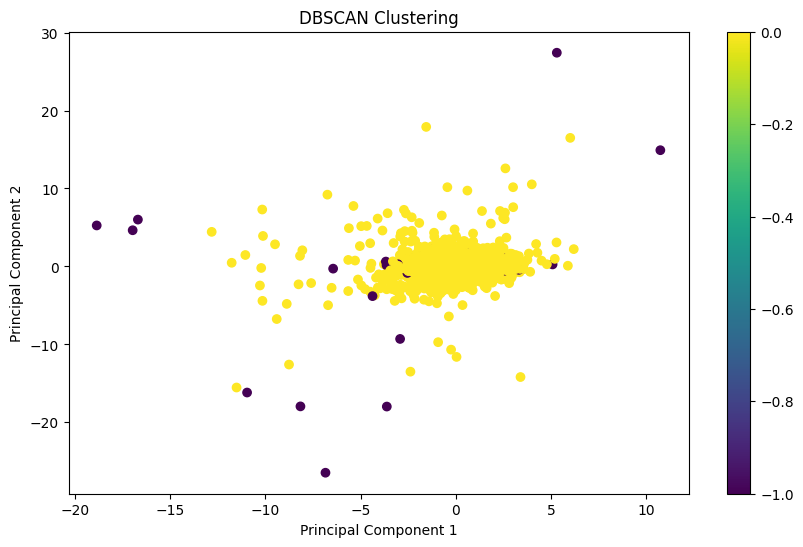

In [261]:
# Apply Epsilon for our DBSCAN clustering
dbscan_plot(features=features_scaled, eps=30, min_samples=50)

In [220]:
tuning_eps_min_samples(features=features_scaled, 
                       eps_values=[10, 20, 25, 30, 35, 40, 45], 
                       min_sample_values=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

Best silhouette score: 0.7564607294179607
Best eps: 45
Best min_samples: 5


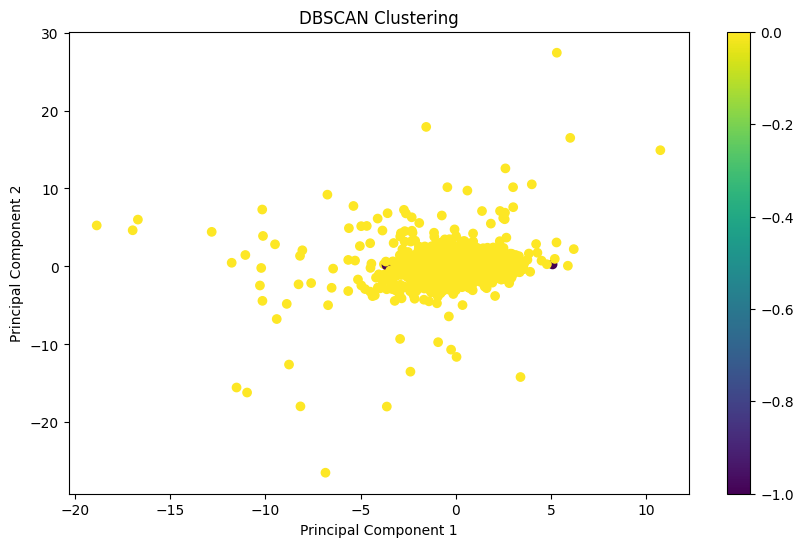

In [262]:
# TRY VALUE FROM Tuning
dbscan_plot(features=features_scaled, eps=45, min_samples=5)

## Dimensionality Reduction

In [263]:
from sklearn.decomposition import PCA

# Number of components to keep
pca = PCA(n_components=0.9)  # Keep 90% of the variance
features_pca = pca.fit_transform(features_scaled)

In [264]:
features_pca.shape

(10299, 65)

### K-Means Clustering

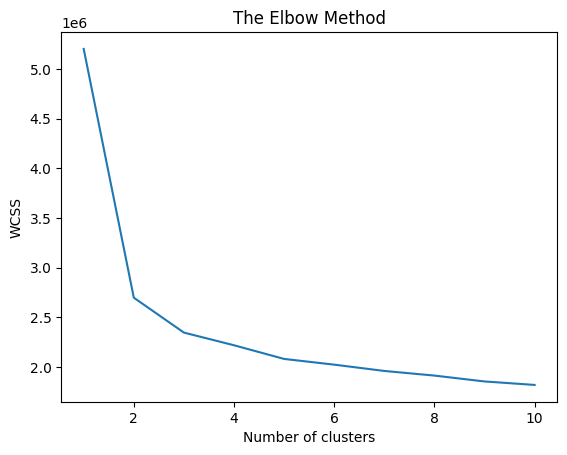

In [265]:
# Find optimal cluster size
kmeans_optimal_finder(features=features_pca)

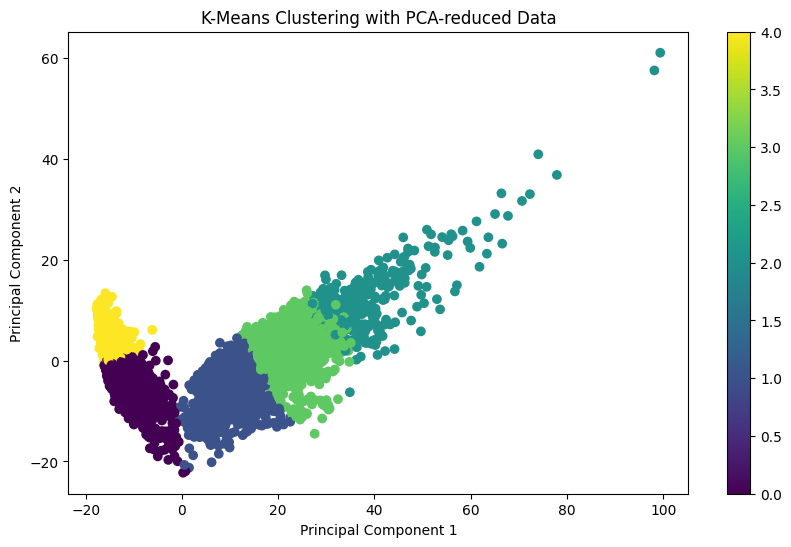

In [266]:
# Apply Optimal value and see the clustering
kmeans_plot(features=features_pca, n_clusters=5, title='pca')

### DBSCAN Clustering

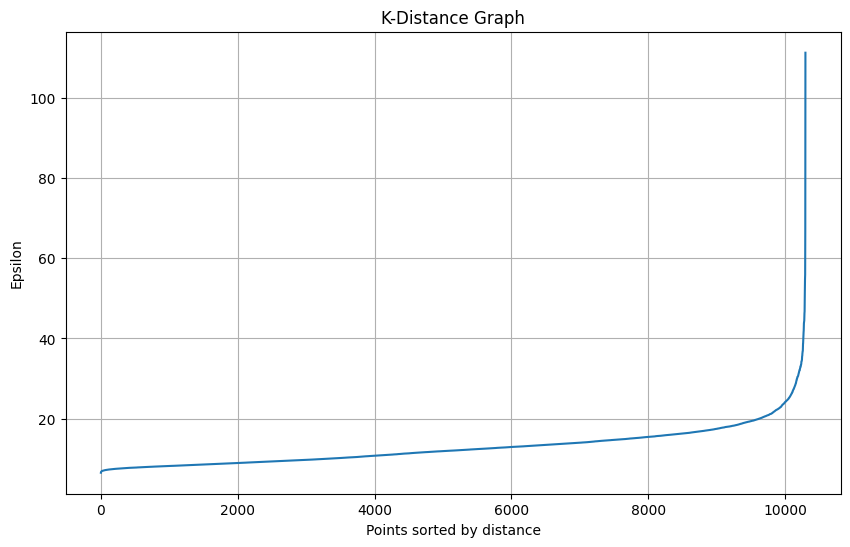

In [267]:
# Find Epsilon for our DBSCAN clustering
KDistanceGraph(features=features_pca, k=50)

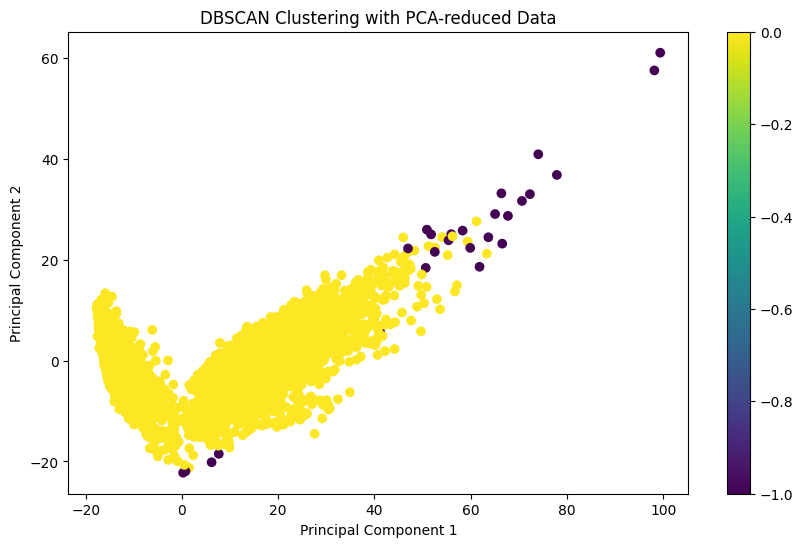

In [268]:
# Apply Epsilon for our DBSCAN clustering
dbscan_plot(features=features_pca, eps=30, min_samples=50, title='pca')

In [230]:
tuning_eps_min_samples(features=features_pca, 
                       eps_values=[10, 20, 25, 30, 35, 40, 50], 
                       min_sample_values=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

Best silhouette score: 0.8018355956788737
Best eps: 35
Best min_samples: 5


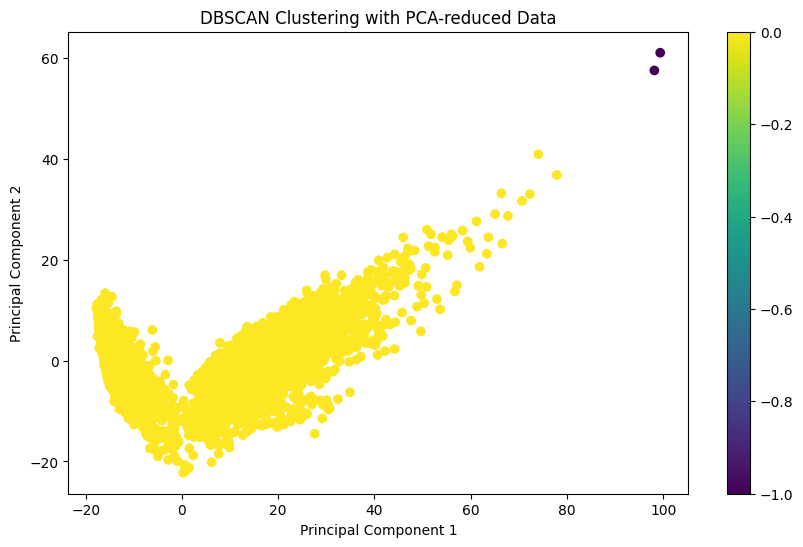

In [269]:
# TRY VALUE FROM Tuning
dbscan_plot(features=features_pca, eps=35, min_samples=5, title='pca')

## Dimensionality Reduction By t-SNE

In [270]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)

# Apply t-SNE to the scaled features
features_tsne = tsne.fit_transform(features_scaled)


In [271]:
features_tsne.shape

(10299, 2)

### K-Means Clustering

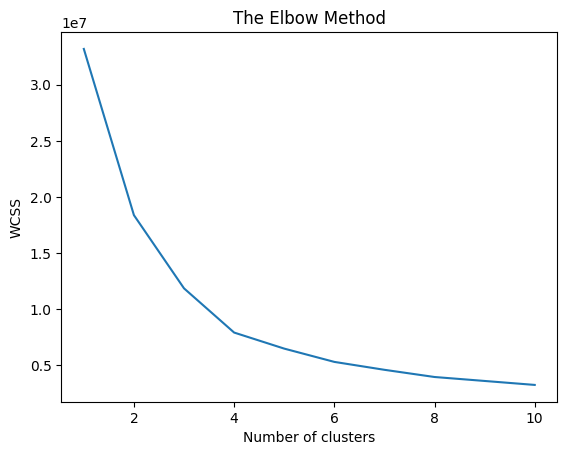

In [272]:
# Find optimal cluster size
kmeans_optimal_finder(features=features_tsne)

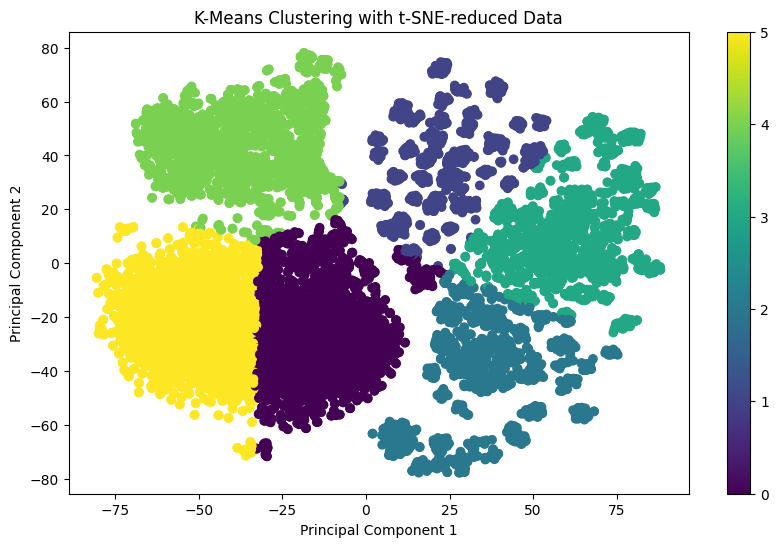

In [273]:
# Apply Optimal value and see the clustering
kmeans_plot(features=features_tsne, n_clusters=6, title='tsne')

### DBSCAN Clustering

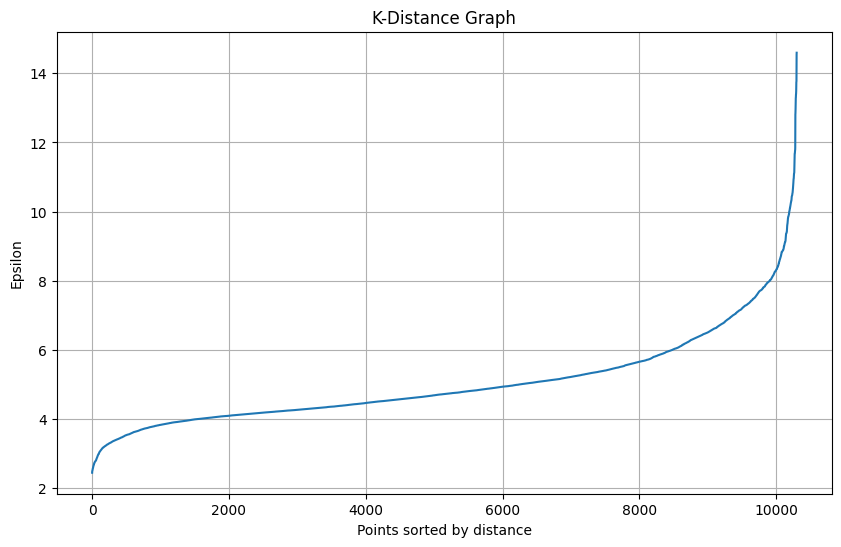

In [274]:
# Find Epsilon for our DBSCAN clustering
KDistanceGraph(features=features_tsne, k=50)

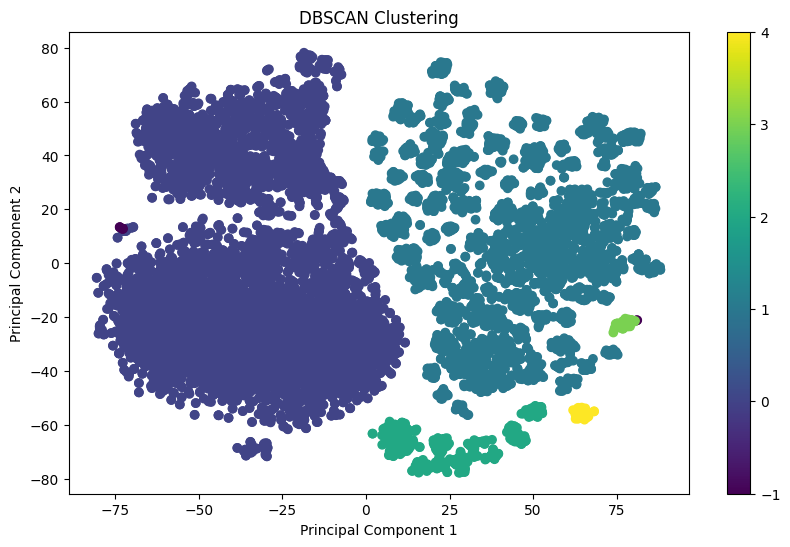

In [275]:
# Apply Epsilon for our DBSCAN clustering
dbscan_plot(features=features_tsne, eps=8, min_samples=50)